In [1]:
using SummationByPartsOperators
using Plots
using Revise
using Distributions
using FFTW
using LinearAlgebra
using Base.Threads
using HDF5
using FileIO
using JLD2
#import Pkg; Pkg.add("LsqFit")
using LsqFit
 
includet("../PIC/PIC-1D/aux_functions/aux_functions.jl")
#includet("../PIC-1D/aux_functions/aux_functions.jl")
includet("local_aux_functions.jl")

In [6]:

#data_name = "data_3d_h_step_cut_small_bola_F_full_T200.jld2"
#data_name = "data_3d_h_step_cut_medium_b_F_full_T200.jld2"
#data_name = "data_3d_h_step_cut_small_bola_F_full_T0.0_SF4em3.jld2"
#data_name = "data_3d_h_step_cut_small_bola_F_full_T0.0_SF4em3.jld2"
#data_name = "data_3d_step_cut_tiny_bola_F_full_T0.0_SF4em3.jld2" #failed 
data_name = "data_3d_step_cut_tiny_bola_FRC_full_T0.0_SF4em3.jld2"
@show data = load("Results/" * data_name)

Dict{String, Any} with 26 entries:
  "norms/norms_00001" => [1.0, 0.0, 1.0, 0.0]
  "u/u_00006"         => [1.0 1.0 … 1.0 1.0; 1.70869e-10 1.70373e-10 … 1.70373e…
  "norms/norms_00004" => [1.00013, 1.16579e-7, 0.9996, 3.47889e-7]
  "u/u_00001"         => [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1…
  "run_name"          => "data_3d_step_cut_tiny_bola_FRC_full_T0.0_SF4em3"
  "norms/norms_00005" => [1.00015, 7.20163e-8, 0.999546, 2.14757e-7]
  "norms/norms_00007" => [1.00017, 2.75575e-8, 0.999492, 8.20647e-8]
  "u/u_00004"         => [1.0 1.0 … 1.0 1.0; 3.89194e-10 3.86471e-10 … 3.86471e…
  "par_evolv"         => (2400, 10, 1200, 0.0)
  "norms/norms_00009" => [1.00018, 1.0547e-8, 0.999471, 3.13651e-8]
  "norms/norms_00006" => [1.00016, 4.45451e-8, 0.999513, 1.32744e-7]
  "u/u_00007"         => [1.0 1.0 … 1.0 1.0; 1.07172e-10 1.06939e-10 … 1.06939e…
  "u/u_00009"         => [1.0 1.0 … 1.0 1.0; 4.13468e-11 4.12809e-11 … 4.12809e…
  "u/u_00003"         => [1.0 1.0 … 1.0 1.0; 4.502

The medium with source_factor = 0.004^2 failed to complete with F_full. 
The tiny failed 
The small with same source_factor (I think did evolved).

In [7]:

par_grid = data["par_grid"]
Box_x, J, n_fields = par_grid
par_evolv  = data["par_evolv"]
T, data_steps, int_steps, dt = par_evolv
run_name = data["run_name"]
size(data["u/u_00002"])
v = zeros(data_steps, size(data["u/u_00002"])...)
m = data_steps
for m in 1:m
    tiempo = @sprintf("%05d", m)
    v[m,:,:,:,:] = data["u/u_$(tiempo)"]
end

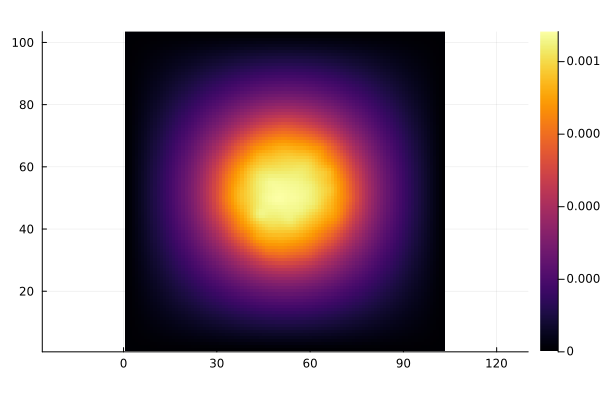

In [8]:
#surface(v[3,1,:,:,J[3] ÷ 2].-1 )
heatmap(v[m,1,:,:,J[3] ÷ 2].-1, aspectratio=1 )

In [9]:
x, y = get_coords(Box_x,J)

([-50.49019607843137, -49.509803921568626, -48.52941176470588, -47.549019607843135, -46.56862745098039, -45.588235294117645, -44.607843137254896, -43.627450980392155, -42.647058823529406, -41.666666666666664  …  40.68627450980391, 41.66666666666666, 42.647058823529406, 43.62745098039214, 44.60784313725489, 45.58823529411764, 46.56862745098039, 47.54901960784312, 48.52941176470587, 49.50980392156862], [-50.49019607843137, -49.509803921568626, -48.52941176470588, -47.549019607843135, -46.56862745098039, -45.588235294117645, -44.607843137254896, -43.627450980392155, -42.647058823529406, -41.666666666666664  …  40.68627450980391, 41.66666666666666, 42.647058823529406, 43.62745098039214, 44.60784313725489, 45.58823529411764, 46.56862745098039, 47.54901960784312, 48.52941176470587, 49.50980392156862], [-50.49019607843137, -49.509803921568626, -48.52941176470588, -47.549019607843135, -46.56862745098039, -45.588235294117645, -44.607843137254896, -43.627450980392155, -42.647058823529406, -41.66

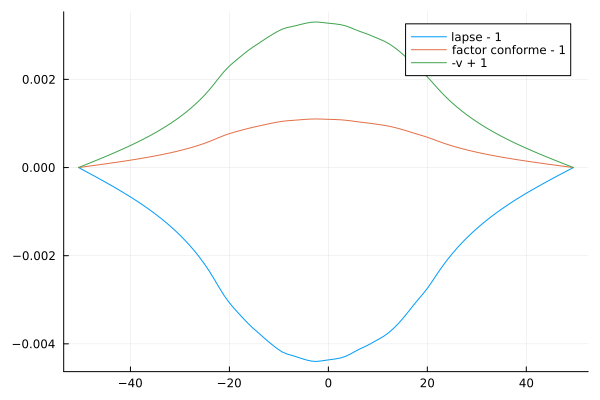

In [10]:
plot(x,v[m,3,:,J[2] ÷ 2 , J[3]÷ 2]./v[m,1,:,J[2] ÷ 2 , J[3]÷ 2] .- 1, label="lapse - 1")
plot!(x,v[m,1,:,J[2] ÷ 2 , J[3]÷ 2].- 1, label="factor conforme - 1")
plot!(x,-v[m,3,:,J[2] ÷ 2 , J[3]÷ 2] .+ 1, label="-v + 1")
#png("lapse and conformal factor after half crossing time")



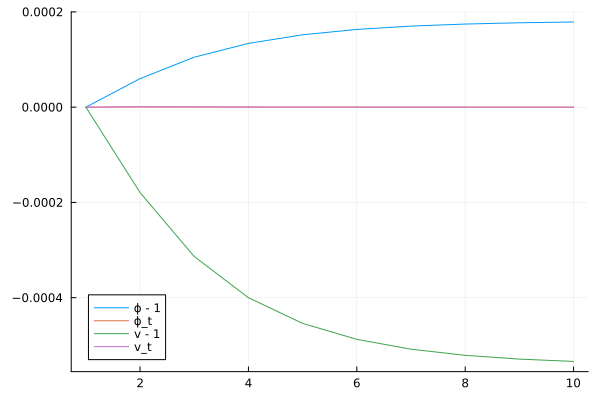

In [11]:
#m = 9
plot([get_norm_time(v,i)[1].-1 for i in 1:m], label="ϕ - 1" )
plot!([get_norm_time(v,i)[2] for i in 1:m], label="ϕ_t" )
plot!([get_norm_time(v,i)[3].-1 for i in 1:m], label="v - 1")
plot!([get_norm_time(v,i)[4] for i in 1:m], label="v_t")

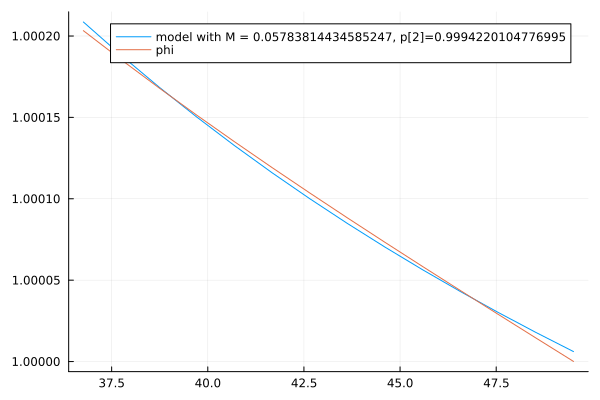

In [19]:
@. model_phi(r,p) = (p[2] + p[1]/2/r)
@. model_v(r,pv) = (pv[2] - pv[1]/2/r)
N = 90
p0 = [1.0,0.0]
fit_phi = curve_fit(model_phi, x[N:J[1]], v[m,1,N:J[1],J[2] ÷ 2 , J[3]÷ 2], p0) 
plot(x[N:J[1]], model_phi(x[N:J[1]],fit_phi.param), label="model with M = $(fit_phi.param[1]), p[2]=$(fit_phi.param[2])")
plot!(x[N:J[1]],v[m,1,N:J[1],J[2] ÷ 2 , J[3]÷ 2], label="phi")
#plot!(x[N:J[1]], model_phi(x[N:J[1]],[0.01]), label="model with M = $(fit_phi.param[1])")
#png("phi_T1600_FRC_full")

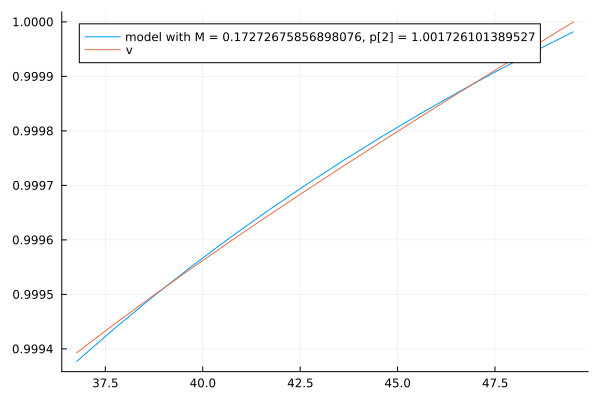

In [20]:
N = 90
pv = [0.0,0.0]
fit_v = curve_fit(model_v, x[N:J[1]], v[m,3,N:J[1],J[2] ÷ 2 , J[3]÷ 2], pv) 
plot(x[N:J[1]], model_v(x[N:J[1]],fit_v.param), label="model with M = $(fit_v.param[1]), p[2] = $(fit_v.param[2])")
plot!(x[N:J[1]],v[m,3,N:J[1],J[2] ÷ 2 , J[3]÷ 2], label="v")
#plot!(x[N:J[1]], model_phi(x[N:J[1]],[0.01]), label="model with M = $(fit_phi.param[1])")
#png("v_T1600_FRC_full")